In [1]:
import json
import urllib
from statistics import mean, median, stdev

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Polygon
from scipy import stats

import dataParser as parser
import helperFiles.buildPlot as plotBuilder

In [2]:
df = pd.read_csv('../merged_1.6.1.csv')

data = []
labels = []
#
labels = parser.load_obj('labels')

In [3]:
for gene in labels:
    print(gene)
    try:
        geneDF, chromsome = parser.getGeneDF(gene)
        geneData = []
        for index, row in geneDF.iterrows():
            if (int(row['seqnames']) == chromsome) and (int(row['altchr']) == chromsome):
                geneData.append(int(row['altpos']) - int(row['start']))
        if len(geneData) == 0:
            data.append([0])
            continue
        data.append(geneData)
    except:
        data.append([0])
parser.save_obj(data, 'lengthData')

XRCC6
XRCC5
PRKDC
LIG4
XRCC4
DCLRE1C
NHEJ1
MRE11
RAD50
NBN
RBBP8
ERCC4
ERCC1
LIG1
POLL
POLB
PARP1
LIG3
XRCC1
RAD51
RAD51B
RAD51D
DMC1
XRCC2
XRCC3
RAD52
RAD54L
RAD54B
BRCA1
MUS81
EME1
EME2
GEN1
UNG
SMUG1
MBD4
TDG
OGG1
MUTYH
NTHL1
MPG
NEIL1
NEIL2
NEIL3
APEX1
APEX2
invalid literal for int() with base 10: 'X'
https://rest.ensembl.org/lookup/symbol/homo_sapiens/APEX2?content-type=application/json;expand=1
symb got fricked
PNKP
APLF
PARP2
PARP3
MGMT
ALKBH2
ALKBH3
TDP1
TDP2
MSH2
MSH3
MSH6
MLH1
PMS2
MSH4
MSH5
MLH3
PMS1
RAD23B
CETN2
invalid literal for int() with base 10: 'X'
https://rest.ensembl.org/lookup/symbol/homo_sapiens/CETN2?content-type=application/json;expand=1
symb got fricked
RAD23A
XPA
DDB1
DDB2
RPA1
RPA2
RPA3
ERCC3
ERCC2
GTF2H1
GTF2H2
GTF2H3
GTF2H4
GTF2H5
CDK7
CCNH
MNAT1
ERCC5
ERCC8
ERCC6
UVSSA
XAB2
MMS19
FANCA
FANCB
invalid literal for int() with base 10: 'X'
https://rest.ensembl.org/lookup/symbol/homo_sapiens/FANCB?content-type=application/json;expand=1
symb got fricked
FANCC
BR

In [4]:
print(data)
stats.f_oneway(*data)

[[100882, 121454, 84830, 58967, 217488, 143932, 2323132, 377405, 83513, 326167], [88687285, 8871, 1408376, 5623, 6085531, 135498115, 170656, 6286237, 58065, 13844], [6577, 72559751, 12270, 96214921, 78410321, 95820132, 57551100, 17337635, 144700, 17385598, 1949, 55915404, 55913453, 12831, 940488, 940899, 3196568, 1536486, 49340767, 34262584, 2101, 24813, 565808, 1905, 1291, 10469449, 25615, 11822, 87025402], [6612379], [6476778, 60777, 4581194, 4491825, 4894340, 64005, 3273067, 3040500, 6096, 1109, 25761583, 80081, 3506, 2645439, 6410451, 71624001, 5251, 9917, 37272066, 18149330, 10504093, 8529763, 8616579], [21039202, 10242, 131559, 9092173, 312733, 50559, 17342908, 33382, 138031, 7852, 7679315], [109249, 65669544, 180681, 20720949, 2632232, 202805, 40974613, 122559, 457883, 45654714, 662208, 37302, 2004205], [100036, 557211, 8397, 3640348, 14435, 127592, 7948, 15419135], [81509989, 40932, 163652, 157827, 5956, 3809872, 4494714, 1059732], [330983, 3795, 137538, 3052, 53313882, 4099841

F_onewayResult(statistic=1.4852944099895502, pvalue=0.00024911932751903794)

In [5]:
for i in range(1, len(labels)):
    label = labels[i]
    print(f"p-value for RAD51B and {label}: {stats.ttest_ind(data[20], data[i])}")

p-value for RAD51B and XRCC5: Ttest_indResult(statistic=-3.805101090103047, pvalue=0.0002105753058104585)
p-value for RAD51B and PRKDC: Ttest_indResult(statistic=-6.023975231391413, pvalue=1.1290145053423497e-08)
p-value for RAD51B and LIG4: Ttest_indResult(statistic=nan, pvalue=nan)
p-value for RAD51B and XRCC4: Ttest_indResult(statistic=-1.989144314829637, pvalue=0.04845647733261935)
p-value for RAD51B and DCLRE1C: Ttest_indResult(statistic=-0.23435181230084753, pvalue=0.8150494264242056)
p-value for RAD51B and NHEJ1: Ttest_indResult(statistic=-2.7777978481764807, pvalue=0.006202229382919064)
p-value for RAD51B and MRE11: Ttest_indResult(statistic=0.5077009784543705, pvalue=0.6124677165347032)
p-value for RAD51B and RAD50: Ttest_indResult(statistic=-1.6436209677223261, pvalue=0.10251456025608977)
p-value for RAD51B and NBN: Ttest_indResult(statistic=-3.353358665271791, pvalue=0.0010220277081042428)
p-value for RAD51B and RBBP8: Ttest_indResult(statistic=-1.0064001043518906, pvalue=0.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


156
156


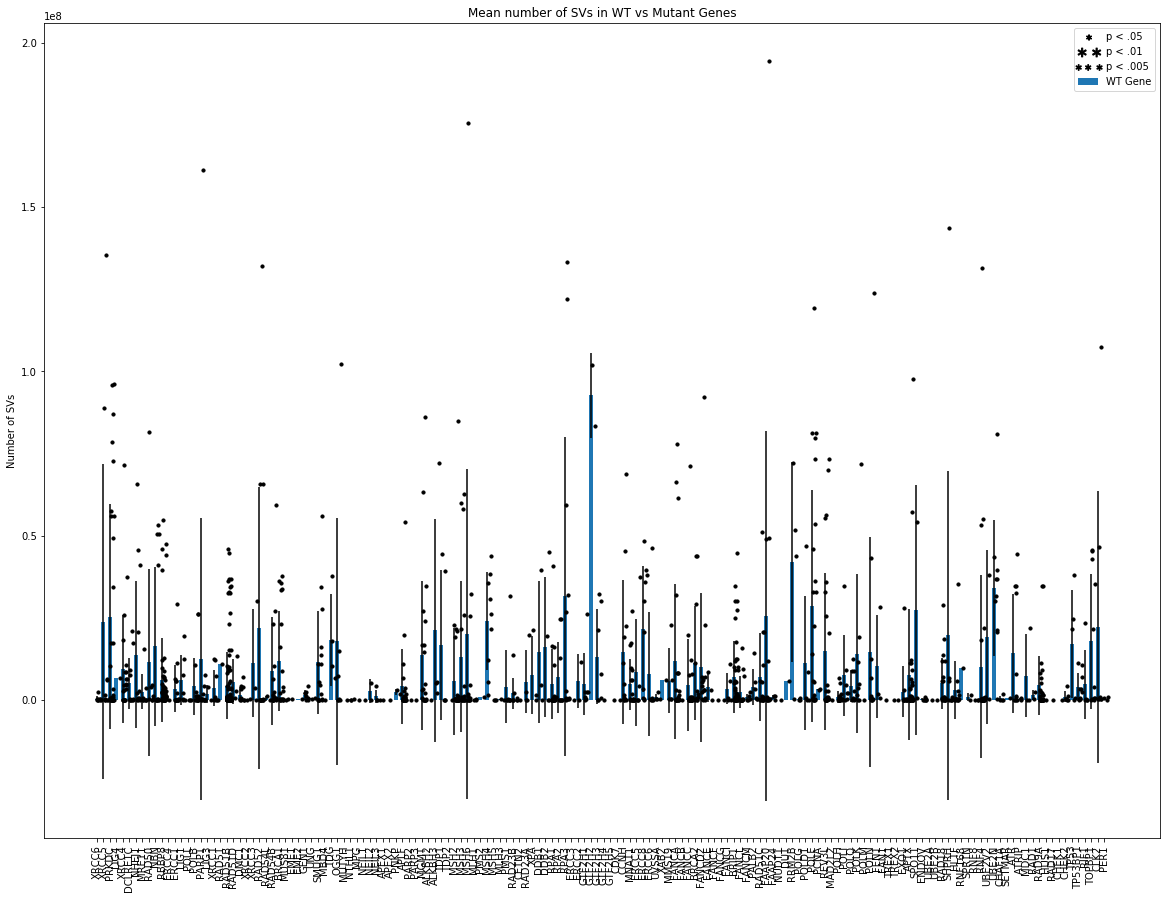

In [14]:
ind = np.arange(start=0, stop=len(data *2), step=2)
width = 1.25  # the width of the bars
fig2, ax2 = plt.subplots(figsize=(20, 15))
means = []
stdevs = []
for dataset in data:
    if len(dataset) == 0:
        means.append(0)
        continue
    means.append(mean(dataset))
for dataset in data:
    try:
        stdevs.append(stdev(dataset))
    except:
        stdevs.append(0)
print(len(ind))
print(len(means))
rects1 = ax2.bar(ind, means, width,
                 label='WT Gene', yerr=stdevs, zorder=0)
for i in range(0, len(ind)):
    # distribute scatter randomly across whole width of bar
    ax2.scatter((ind[i]) + np.random.rand(len(data[i])) *
                width, data[i], color='black', zorder=10, s=10)
ax2.set_ylabel('Number of SVs')
ax2.set_title('Mean number of SVs in WT vs Mutant Genes')
ax2.set_xticks(ind)
ax2.set_xticklabels(labels)
plt.xticks(rotation=90)
plt.scatter([], [], marker=r'$\ast$', label="p < .05",
            color='black', linestyle='None')
plt.scatter([], [], marker=r'$\ast\ast$', label="p < .01",
            color='black', linestyle='None', s=600)
plt.scatter([], [], marker=r'$\ast\ast\ast$',
            label="p < .005", color='black', linestyle='None', s=750)
ax2.legend()

In [12]:
forBarPlot = []
for gene in labels:
    print(gene)
    try:
        geneDF, chromsome = parser.getGeneDF(gene)

        geneData = 0

        for index, row in geneDF.iterrows():
            if (int(row['seqnames'])) != (int(row['altchr'])):
                geneData += 1
        forBarPlot.append(geneData)
    except:
        forBarPlot.append(0)
        continue


XRCC6
XRCC5
PRKDC
LIG4
XRCC4
DCLRE1C
NHEJ1
MRE11
RAD50
NBN
RBBP8
ERCC4
ERCC1
LIG1
POLL
POLB
PARP1
LIG3
XRCC1
RAD51
RAD51B
RAD51D
DMC1
XRCC2
XRCC3
RAD52
RAD54L
RAD54B
BRCA1
MUS81
EME1
EME2
GEN1
UNG
SMUG1
MBD4
TDG
OGG1
MUTYH
NTHL1
MPG
NEIL1
NEIL2
NEIL3
APEX1
APEX2
invalid literal for int() with base 10: 'X'
https://rest.ensembl.org/lookup/symbol/homo_sapiens/APEX2?content-type=application/json;expand=1
symb got fricked
PNKP
APLF
PARP2
PARP3
MGMT
ALKBH2
ALKBH3
TDP1
TDP2
MSH2
MSH3
MSH6
MLH1
PMS2
MSH4
MSH5
MLH3
PMS1
RAD23B
CETN2
invalid literal for int() with base 10: 'X'
https://rest.ensembl.org/lookup/symbol/homo_sapiens/CETN2?content-type=application/json;expand=1
symb got fricked
RAD23A
XPA
DDB1
DDB2
RPA1
RPA2
RPA3
ERCC3
ERCC2
GTF2H1
GTF2H2
GTF2H3
GTF2H4
GTF2H5
CDK7
CCNH
MNAT1
ERCC5
ERCC8
ERCC6
UVSSA
XAB2
MMS19
FANCA
FANCB
invalid literal for int() with base 10: 'X'
https://rest.ensembl.org/lookup/symbol/homo_sapiens/FANCB?content-type=application/json;expand=1
symb got fricked
FANCC
BR

[7, 0, 3, 0, 11, 2, 9, 0, 0, 5, 19, 0, 7, 1, 0, 7, 5, 5, 2, 1, 41, 2, 8, 1, 0, 8, 1, 4, 13, 3, 0, 3, 1, 0, 3, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 16, 0, 0, 7, 1, 0, 5, 1, 11, 2, 10, 6, 0, 3, 3, 0, 3, 1, 0, 0, 2, 1, 0, 4, 4, 1, 0, 1, 0, 0, 2, 0, 0, 0, 3, 14, 1, 4, 3, 1, 0, 1, 7, 0, 8, 2, 3, 2, 0, 0, 2, 15, 3, 0, 7, 8, 0, 6, 0, 0, 1, 4, 6, 6, 0, 9, 1, 4, 1, 5, 8, 1, 10, 0, 0, 0, 0, 2, 11, 2, 1, 0, 1, 15, 5, 2, 3, 0, 2, 8, 3, 4, 2, 1, 8, 2, 0, 0, 15, 2, 0, 0, 0, 2, 3, 7, 5, 0, 0]


[Text(0, 0, 'XRCC6'),
 Text(0, 0, 'XRCC5'),
 Text(0, 0, 'PRKDC'),
 Text(0, 0, 'LIG4'),
 Text(0, 0, 'XRCC4'),
 Text(0, 0, 'DCLRE1C'),
 Text(0, 0, 'NHEJ1'),
 Text(0, 0, 'MRE11'),
 Text(0, 0, 'RAD50'),
 Text(0, 0, 'NBN'),
 Text(0, 0, 'RBBP8'),
 Text(0, 0, 'ERCC4'),
 Text(0, 0, 'ERCC1'),
 Text(0, 0, 'LIG1'),
 Text(0, 0, 'POLL'),
 Text(0, 0, 'POLB'),
 Text(0, 0, 'PARP1'),
 Text(0, 0, 'LIG3'),
 Text(0, 0, 'XRCC1'),
 Text(0, 0, 'RAD51'),
 Text(0, 0, 'RAD51B'),
 Text(0, 0, 'RAD51D'),
 Text(0, 0, 'DMC1'),
 Text(0, 0, 'XRCC2'),
 Text(0, 0, 'XRCC3'),
 Text(0, 0, 'RAD52'),
 Text(0, 0, 'RAD54L'),
 Text(0, 0, 'RAD54B'),
 Text(0, 0, 'BRCA1'),
 Text(0, 0, 'MUS81'),
 Text(0, 0, 'EME1'),
 Text(0, 0, 'EME2'),
 Text(0, 0, 'GEN1'),
 Text(0, 0, 'UNG'),
 Text(0, 0, 'SMUG1'),
 Text(0, 0, 'MBD4'),
 Text(0, 0, 'TDG'),
 Text(0, 0, 'OGG1'),
 Text(0, 0, 'MUTYH'),
 Text(0, 0, 'NTHL1'),
 Text(0, 0, 'MPG'),
 Text(0, 0, 'NEIL1'),
 Text(0, 0, 'NEIL2'),
 Text(0, 0, 'NEIL3'),
 Text(0, 0, 'APEX1'),
 Text(0, 0, 'APEX2'),
 

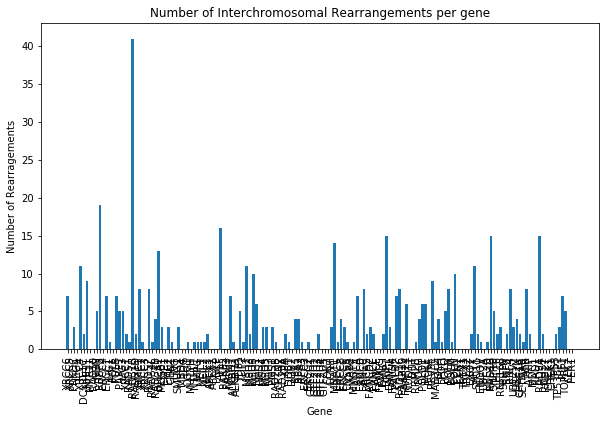

In [13]:
print(forBarPlot)

fig1, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Basic Plot')
x = np.arange(len(labels))
rects = ax.bar(x, forBarPlot)
ax.set_ylabel('Number of Rearragements')
ax.set_xlabel('Gene')
ax.set_title('Number of Interchromosomal Rearrangements per gene')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)